In [25]:
import geopandas as gpd
import datetime as dt 
import pandas as pd

departements = ['departement-78-yvelines', 'departement-01-ain', 'departement-25-doubs']

sd = dt.datetime.strptime('2024-01-01', '%Y-%m-%d').date()
ed = dt.datetime.strptime('2024-07-01', '%Y-%m-%d').date()
geos = []
for dept in departements:
    d = sd
    while d != ed:
        try:
            geo = gpd.read_file(dept + '/' + 'interface/' +'hexagones_today_'+d.strftime('%Y-%m-%d')+'.geojson')[['scale0', 'id', 'fire_prediction_raw', 'fire_prediction', 'fire_prediction_dept', 'geometry', 'nbfirepoint']]
            geo['departement'] = dept
            geo['date'] = d.strftime('%Y-%m-%d')
            geos.append(geo)
        except Exception as e:
            print(e)
        d += dt.timedelta(days=1)

geos = pd.concat(geos)

In [26]:
geos.groupby('departement')['nbfirepoint'].sum()

departement
departement-01-ain         30.0
departement-25-doubs        6.0
departement-78-yvelines    12.0
Name: nbfirepoint, dtype: float64

In [27]:
geos[(geos['departement'] == 'departement-01-ain') & (geos['nbfirepoint'] > 0)].date.unique()

array(['2024-06-12', '2024-06-13', '2024-06-14', '2024-06-16',
       '2024-06-17', '2024-06-18', '2024-06-19', '2024-06-20',
       '2024-06-21', '2024-06-22', '2024-06-23', '2024-06-24',
       '2024-06-25', '2024-06-26', '2024-06-27', '2024-06-28'],
      dtype=object)

In [28]:
geos[(geos['departement'] == 'departement-01-ain') & (geos['date'] == '2024-06-28')].nbfirepoint.sum()

2.0

In [29]:
geos.departement.unique()

array(['departement-78-yvelines', 'departement-01-ain',
       'departement-25-doubs'], dtype=object)

In [30]:
len(geos)

550732

In [31]:
geos['nbfirepoint'].unique(), geos['nbfirepoint'].sum()

(array([0., 1.]), 48.0)

In [32]:
import matplotlib.pyplot as plt

id
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
19    1.0
20    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
28    1.0
30    1.0
31    1.0
32    1.0
34    1.0
35    1.0
36    1.0
37    1.0
38    1.0
39    1.0
40    1.0
41    1.0
42    1.0
43    1.0
44    1.0
45    1.0
46    1.0
47    1.0
48    1.0
49    1.0
50    2.0
51    1.0
52    1.0
53    1.0
54    1.0
55    1.0
56    1.0
57    1.0
58    2.0
Name: fire_prediction, dtype: float64

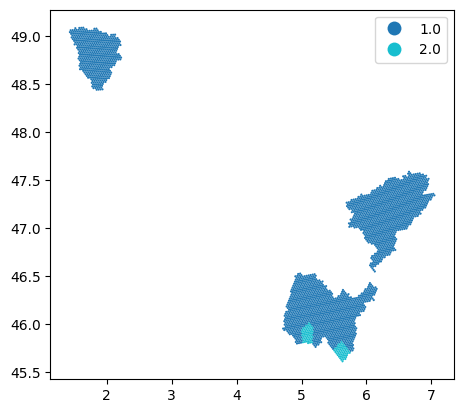

In [33]:
geos.dropna(subset='fire_prediction', inplace=True)
geos[geos['date'] == '2024-06-17'].plot('fire_prediction', categorical=True, legend=True)
geos[geos['date'] == '2024-06-17'].groupby('id')['fire_prediction'].mean()

<Axes: >

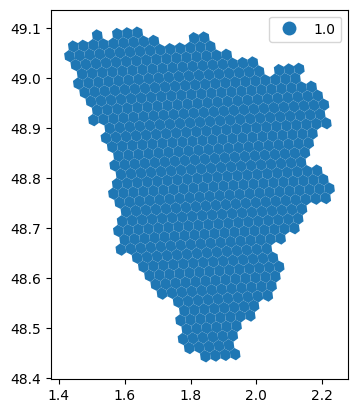

In [42]:
geos[(geos['date'] == '2024-06-18') & (geos['departement'] == 'departement-78-yvelines')].plot('fire_prediction', categorical=True, legend=True)

<Axes: >

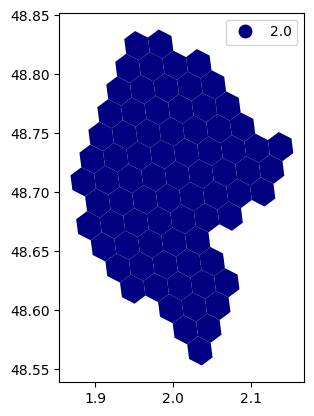

In [35]:
geos[(geos['date'] == '2024-06-29') & (geos['id'] == 1)].plot(column='fire_prediction', categorical=True, legend=True, cmap='jet')

In [36]:
geos['nbfirepoint'].unique()

array([0., 1.])

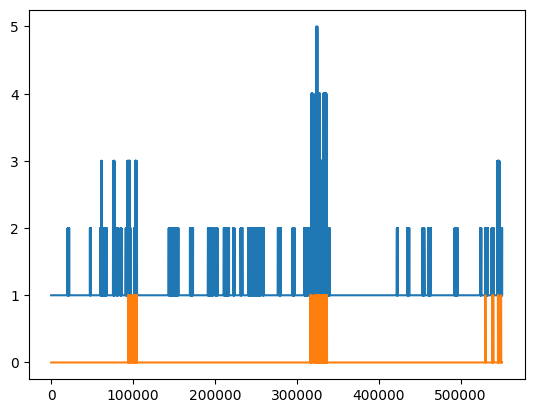

In [37]:
plt.plot(geos['fire_prediction'].values)
plt.plot(geos['nbfirepoint'].values)

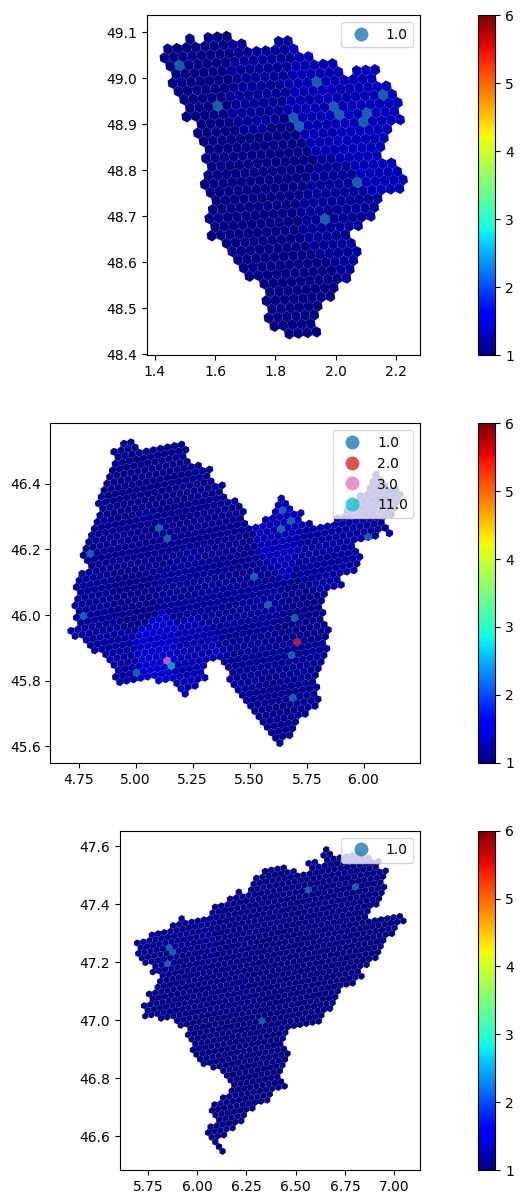

In [38]:
gb = geos.groupby(['scale0', 'departement'])[['fire_prediction']].mean().reset_index()
gb2 = geos.groupby(['scale0', 'departement'])[['nbfirepoint']].sum().reset_index()
gb['nbfirepoint'] = gb2['nbfirepoint']
gb = gb.set_index('scale0').join(other=geos[geos['date'] ==  '2024-06-18'][['geometry', 'scale0']].set_index('scale0'), on='scale0').reset_index()
gb = gpd.GeoDataFrame(gb, geometry=gb.geometry)

fig, ax = plt.subplots(len(departements), figsize=(15,15))

for i, dept in enumerate(departements):
    gb[gb['departement'] == dept].plot(column='fire_prediction', vmin=1, vmax=6, legend=True, ax=ax[i], cmap='jet')
    gb[(gb['nbfirepoint'] > 0) & (gb['departement'] == dept)].plot(column='nbfirepoint', ax=ax[i], alpha=0.8, legend=True, categorical=True)

['2024-06-12' '2024-06-13' '2024-06-14' '2024-06-16' '2024-06-17'
 '2024-06-18' '2024-06-19' '2024-06-20' '2024-06-21' '2024-06-22'
 '2024-06-23' '2024-06-24' '2024-06-25' '2024-06-26' '2024-06-27'
 '2024-06-28' '2024-06-29' '2024-06-30']
date
2024-06-12    1.0
2024-06-13    1.0
2024-06-14    1.0
2024-06-16    0.0
2024-06-17    1.0
2024-06-18    0.0
2024-06-19    0.0
2024-06-20    1.0
2024-06-21    0.0
2024-06-22    0.0
2024-06-23    0.0
2024-06-24    2.0
2024-06-25    1.0
2024-06-26    1.0
2024-06-27    0.0
2024-06-28    1.0
2024-06-29    1.0
2024-06-30    1.0
Name: nbfirepoint, dtype: float64


<Axes: >

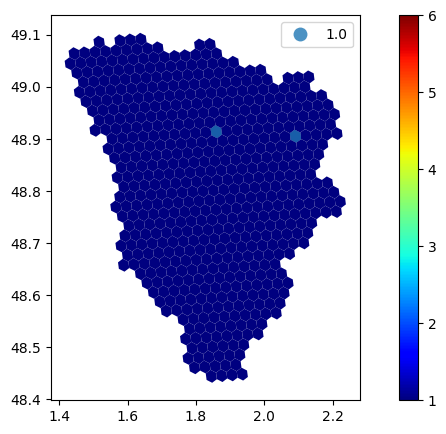

In [39]:
# Yvelines
datewfire = geos[geos['nbfirepoint'] > 0].date
geosFYvelines = geos[(geos['departement'] == 'departement-78-yvelines') & (geos['date'].isin(datewfire))]
print(geosFYvelines.date.unique())
print(geosFYvelines.groupby('date')['nbfirepoint'].sum())
fig, ax = plt.subplots(1, figsize=(10,5))
geosFYvelines[geosFYvelines['date'] == '2024-06-24'].plot(column='fire_prediction', ax=ax, vmin=1, vmax=6, cmap='jet', legend=True)
geosFYvelines[(geosFYvelines['date'] == '2024-06-24') & (geosFYvelines['nbfirepoint'] > 0)].plot(column='nbfirepoint', alpha=0.8, legend=True, categorical=True, ax=ax)

['2024-06-12' '2024-06-13' '2024-06-14' '2024-06-16' '2024-06-17'
 '2024-06-18' '2024-06-19' '2024-06-20' '2024-06-21' '2024-06-22'
 '2024-06-23' '2024-06-24' '2024-06-25' '2024-06-26' '2024-06-27'
 '2024-06-28' '2024-06-29' '2024-06-30']
date
2024-06-12    1.0
2024-06-13    2.0
2024-06-14    1.0
2024-06-16    1.0
2024-06-17    1.0
2024-06-18    5.0
2024-06-19    1.0
2024-06-20    1.0
2024-06-21    1.0
2024-06-22    1.0
2024-06-23    2.0
2024-06-24    2.0
2024-06-25    2.0
2024-06-26    4.0
2024-06-27    3.0
2024-06-28    2.0
2024-06-29    0.0
2024-06-30    0.0
Name: nbfirepoint, dtype: float64


<Axes: >

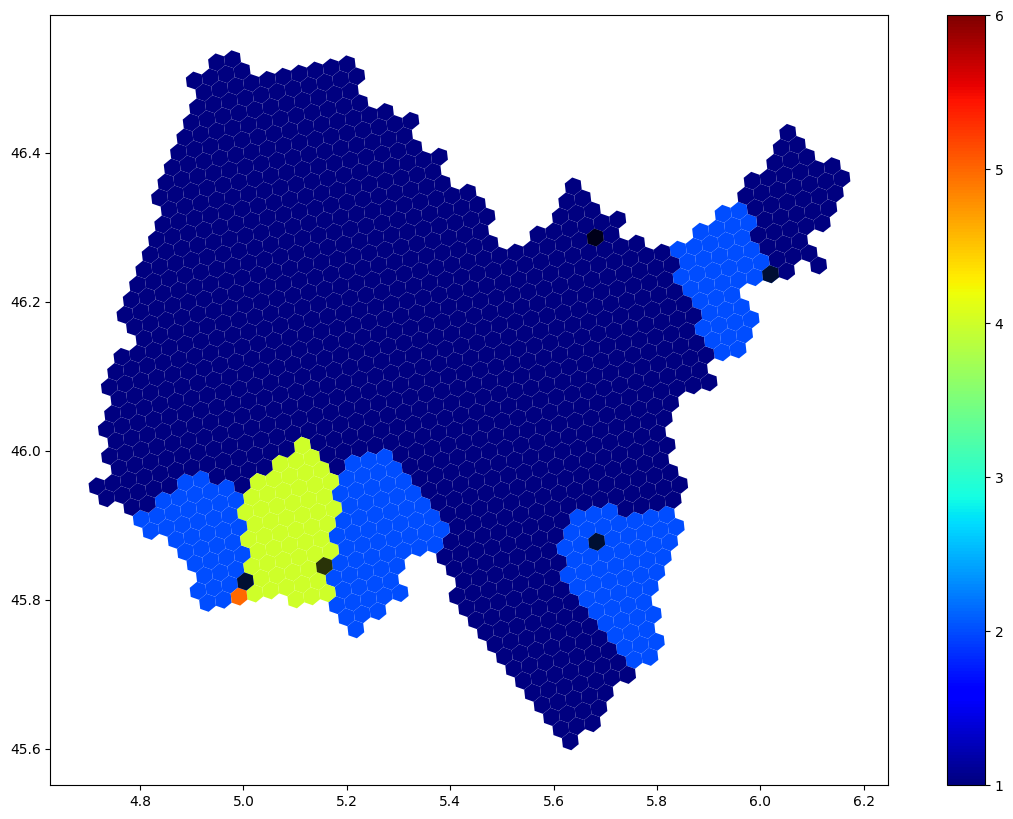

In [40]:
# Ain
datewfire = geos[geos['nbfirepoint'] > 0].date
geosFYvelines = geos[(geos['departement'] == 'departement-01-ain') & (geos['date'].isin(datewfire))]
print(geosFYvelines.date.unique())
print(geosFYvelines.groupby('date')['nbfirepoint'].sum())
fig, ax = plt.subplots(1, figsize=(15,10))
geosFYvelines[geosFYvelines['date'] == '2024-06-18'].plot(column='fire_prediction', ax=ax, vmin=1, vmax=6, cmap='jet', legend=True)
geosFYvelines[(geosFYvelines['date'] == '2024-06-18') & (geosFYvelines['nbfirepoint'] > 0)].plot(column='nbfirepoint', alpha=0.8, cmap='binary', ax=ax, vmin=0)

['2024-06-12' '2024-06-13' '2024-06-14' '2024-06-16' '2024-06-17'
 '2024-06-18' '2024-06-19' '2024-06-20' '2024-06-21' '2024-06-22'
 '2024-06-23' '2024-06-24' '2024-06-25' '2024-06-26' '2024-06-27'
 '2024-06-28' '2024-06-29' '2024-06-30']
date
2024-06-12    0.0
2024-06-13    1.0
2024-06-14    0.0
2024-06-16    0.0
2024-06-17    0.0
2024-06-18    0.0
2024-06-19    0.0
2024-06-20    1.0
2024-06-21    1.0
2024-06-22    0.0
2024-06-23    0.0
2024-06-24    0.0
2024-06-25    0.0
2024-06-26    1.0
2024-06-27    1.0
2024-06-28    0.0
2024-06-29    1.0
2024-06-30    0.0
Name: nbfirepoint, dtype: float64


<Axes: >

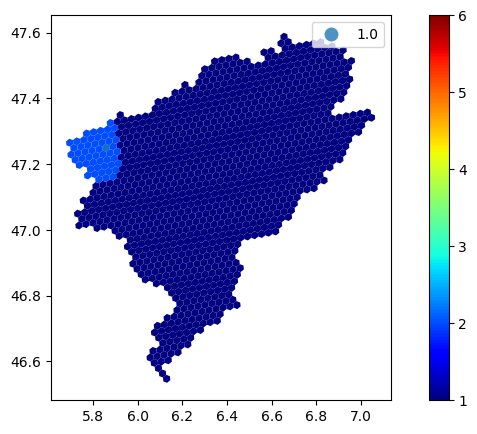

In [43]:
# Doubs
datewfire = geos[geos['nbfirepoint'] > 0].date
geosFYvelines = geos[(geos['departement'] == 'departement-25-doubs') & (geos['date'].isin(datewfire))]
print(geosFYvelines.date.unique())
print(geosFYvelines.groupby('date')['nbfirepoint'].sum())
fig, ax = plt.subplots(1, figsize=(10,5))
geosFYvelines[geosFYvelines['date'] == '2024-06-29'].plot(column='fire_prediction', ax=ax, vmin=1, vmax=6, cmap='jet', legend=True)
geosFYvelines[(geosFYvelines['date'] == '2024-06-29') & (geosFYvelines['nbfirepoint'] > 0)].plot(column='nbfirepoint', alpha=0.8, legend=True, categorical=True, ax=ax)

In [ ]:
geos.date.values[0]

'2024-06-01'

In [44]:
gb3 = geos.groupby(by=['id', 'date', 'departement'])[['fire_prediction', 'fire_prediction_raw']].mean().reset_index()
gb4 = geos.groupby(by=['id', 'date'])[['nbfirepoint']].sum().reset_index()
gb3['nbfirepoint'] = gb4['nbfirepoint']
gb3.sort_values('date', inplace=True)
gb3

,id,date,departement,fire_prediction,fire_prediction_raw,nbfirepoint
0,0,2024-01-01,departement-25-doubs,1.0,0.554134,0.0
8190,52,2024-01-01,departement-25-doubs,1.0,0.632823,0.0
3094,20,2024-01-01,departement-78-yvelines,1.0,0.287017,0.0
2912,19,2024-01-01,departement-78-yvelines,1.0,0.766457,0.0
2730,17,2024-01-01,departement-01-ain,1.0,1.453455,0.0
...,...,...,...,...,...,...
5459,36,2024-06-30,departement-01-ain,1.0,1.837611,0.0
5277,35,2024-06-30,departement-25-doubs,1.0,0.316215,0.0
5095,34,2024-06-30,departement-25-doubs,2.0,2.654023,0.0
6915,44,2024-06-30,departement-25-doubs,1.0,0.266973,0.0


Text(0.5, 1.0, 'Ain')

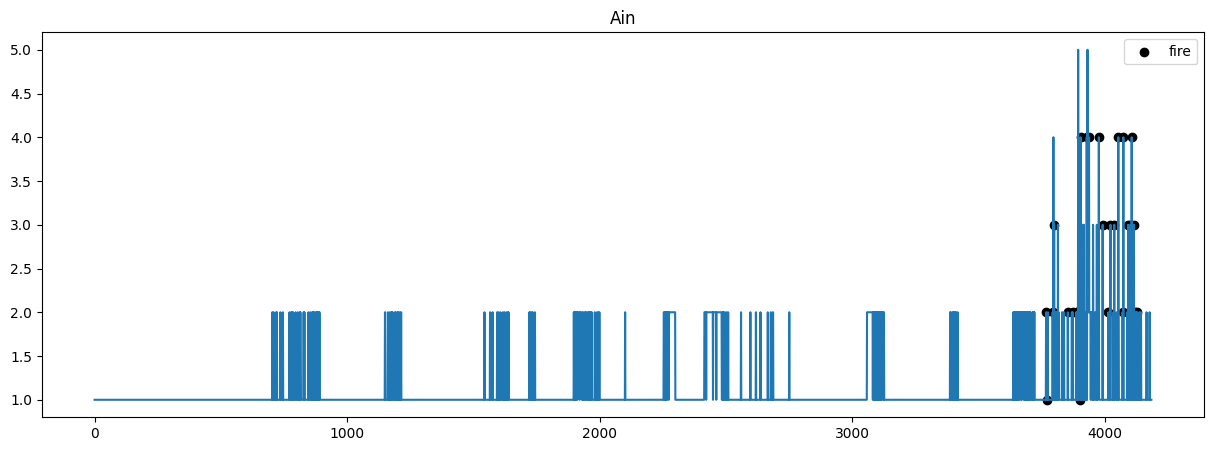

In [51]:
import numpy as np
val = gb3[gb3['departement'] == 'departement-01-ain'].sort_values('date')['fire_prediction'].values
valbin = gb3[gb3['departement'] == 'departement-01-ain'].sort_values('date')['nbfirepoint'].values
plt.figure(figsize=(15,5))
plt.plot(val)
mask = np.argwhere(valbin > 0)
plt.scatter(mask[:,0], val[mask], label='fire', c='black')
plt.legend()
plt.title('Ain')

Text(0.5, 1.0, 'Doubs')

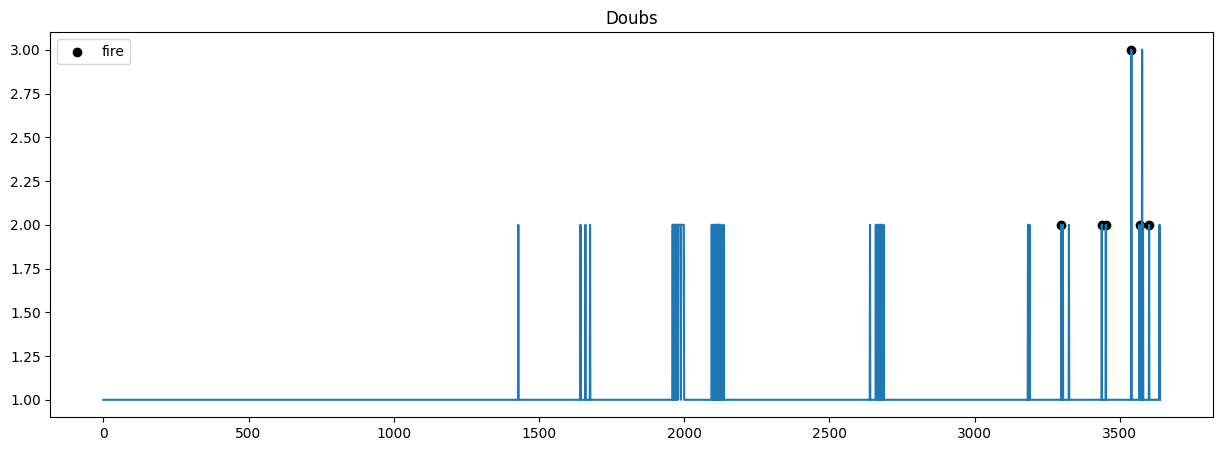

In [52]:
import numpy as np
val = gb3[gb3['departement'] == 'departement-25-doubs'].sort_values('date')['fire_prediction'].values
valbin = gb3[gb3['departement'] == 'departement-25-doubs'].sort_values('date')['nbfirepoint'].values
plt.figure(figsize=(15,5))
plt.plot(val)
mask = np.argwhere(valbin > 0)
plt.scatter(mask[:,0], val[mask], label='fire', c='black')
plt.legend()
plt.title('Doubs')

Text(0.5, 1.0, 'Yvelines')

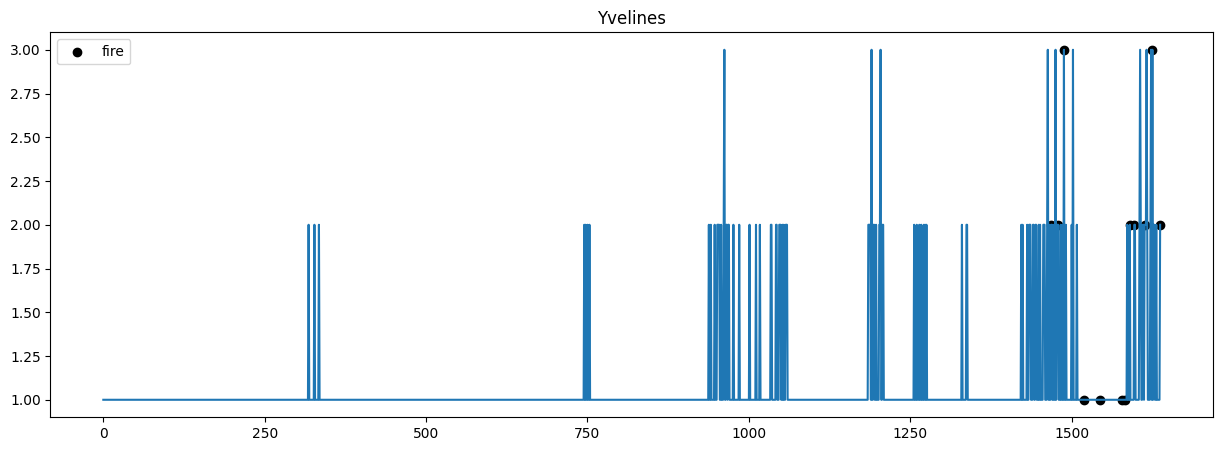

In [53]:
import numpy as np
val = gb3[gb3['departement'] == 'departement-78-yvelines'].sort_values('date')['fire_prediction'].values
valbin = gb3[gb3['departement'] == 'departement-78-yvelines'].sort_values('date')['nbfirepoint'].values
plt.figure(figsize=(15,5))
plt.plot(val)
mask = np.argwhere(valbin > 0)
plt.scatter(mask[:,0], val[mask], label='fire', c='black')
plt.legend()
plt.title('Yvelines')

In [48]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

def my_f1_score(ytrue , ypredNumpy, isBin : bool, weights = None):

    bounds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    ytrueRegNumpy = ypredNumpy
    ytrueNumpy = ytrue

    weightsNumpy = np.ones(ypredNumpy.shape[0])
    maxi = np.max(ypredNumpy)

    bestScore = 0.0
    prec = 0.0
    rec = 0.0
    bestBound = 0.0
    for bound in bounds:
        if isBin:
            yBinPred = (ypredNumpy > bound * maxi).astype(int)
        else:
            yBinPred = (ytrueRegNumpy > bound * maxi).astype(int)

        f1 = f1_score(ytrueNumpy, yBinPred, sample_weight=weightsNumpy)
        if f1 > bestScore:
            bestScore = f1
            bestBound =  bound
            prec = precision_score(ytrueNumpy, yBinPred, sample_weight=weightsNumpy)
            rec = recall_score(ytrueNumpy, yBinPred, sample_weight=weightsNumpy)
    
    if not isBin:
        yBinPred = (ypredNumpy > bestBound * maxi).astype(int)
        f1 = f1_score(ytrueNumpy, yBinPred, sample_weight=weightsNumpy)
        bestScore = f1
        bestBound =  bound
        prec = precision_score(ytrueNumpy, yBinPred, sample_weight=weightsNumpy)
        rec = recall_score(ytrueNumpy, yBinPred, sample_weight=weightsNumpy)

    return (bestScore, prec, rec, bestBound, ypredNumpy > bestBound * maxi)

res = my_f1_score((gb3.nbfirepoint > 0).astype(int), gb3.fire_prediction_raw.values, None)
res

(0.26153846153846155,
 0.2,
 0.37777777777777777,
 0.9,
 array([False, False, False, ..., False, False, False]))

In [49]:
def class_risk(ytrue, yclass) -> dict:
    
    res = {}
    uniqueClass = np.unique(yclass)
    for c in uniqueClass:
        classIndex = np.argwhere(yclass == c)
        classBin = ytrue[classIndex] > 0
        meanF = round(np.mean(classBin), 3)
        res[c] = (meanF)
    return res

cr = class_risk(gb3.nbfirepoint.values, gb3.fire_prediction.values)
cr

{1.0: 0.001, 2.0: 0.037, 3.0: 0.37, 4.0: 0.875, 5.0: 0.0}

Text(0.5, 0, 'Class')

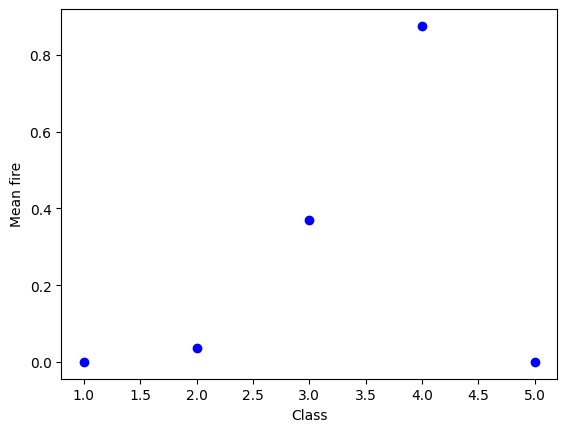

In [50]:
for key, val in cr.items():
    plt.scatter(key, val, c='blue')

plt.ylabel('Mean fire')
plt.xlabel('Class')